## Import dependencies and breast cancer data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings

from scipy import stats


from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

In [3]:
data = load_breast_cancer()
# data.feature_names
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
# labels = ['clump_thickness','size_uniformity','shape_uniformity','marginal_adhesion']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Split DF into 3 sections to help make heatmaps more readable

In [5]:
df_worst = df.iloc[:, 20:]
df_error = df.iloc[:, 10:20]
df_mean = df.iloc[:, :10]

## Create heat maps for each of the three different error types

#### Heat map for mean

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(8, 0)

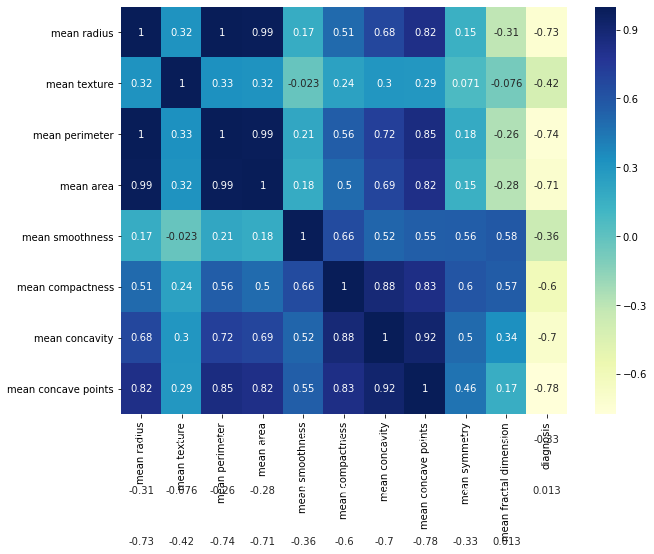

In [6]:

df_mean['diagnosis'] = data.target
# df['diagnosis'] = data.target
corr = df_mean.corr()
# corr = df.corr()
plt.figure(figsize=(10,7.5))
ax = sns.heatmap(corr,
       annot = True,

#        xticklabels=corr.columns,
#        yticklabels=corr.columns,
#        annot_kws={'size': 10},
       cmap="YlGnBu")

ax.set_ylim(8, 0)

#### Heat map for error

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(8, 0)

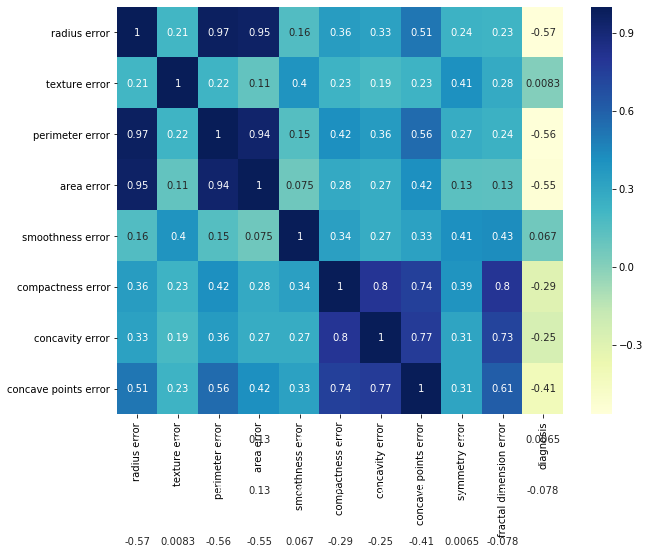

In [7]:
df_error['diagnosis'] = data.target
corr = df_error.corr()
# corr = df.corr()
plt.figure(figsize=(10,7.5))
ax = sns.heatmap(corr,
       annot = True,
#        xticklabels=corr.columns,
#        yticklabels=corr.columns,
#        annot_kws={'size': 10},
       cmap="YlGnBu")

ax.set_ylim(8, 0)

#### Heat map for worst error

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(8, 0)

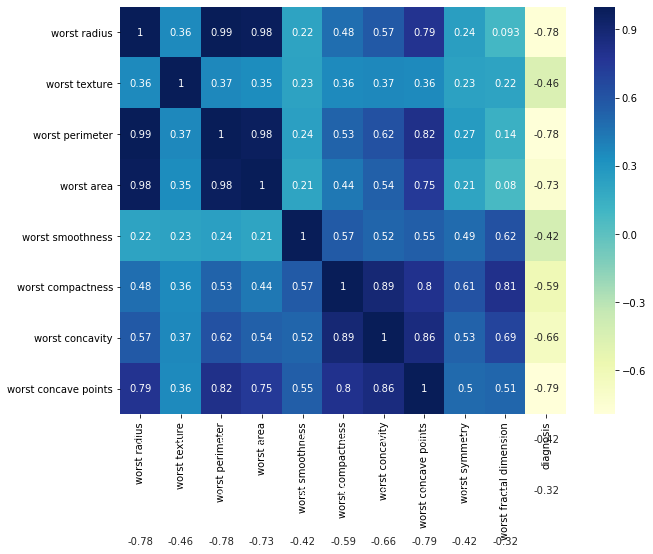

In [8]:
df_worst['diagnosis'] = data.target
corr = df_worst.corr()
# corr = df.corr()
plt.figure(figsize=(10,7.5))
ax = sns.heatmap(corr,
       annot = True,
#        xticklabels=corr.columns,
#        yticklabels=corr.columns,
#        annot_kws={'size': 10},
       cmap="YlGnBu")

ax.set_ylim(8, 0)

###  Clean DFs to remove extra features with mutlicollinearity 

In [9]:
df_mean = df_mean.drop(['mean perimeter', 'mean area', 'mean concavity'], axis=1)
df_error = df_error.drop(['perimeter error', 'area error', 'concavity error'], axis=1)
df_worst = df_worst.drop(['worst perimeter', 'worst area', 'worst concavity'], axis=1)

(8, 0)

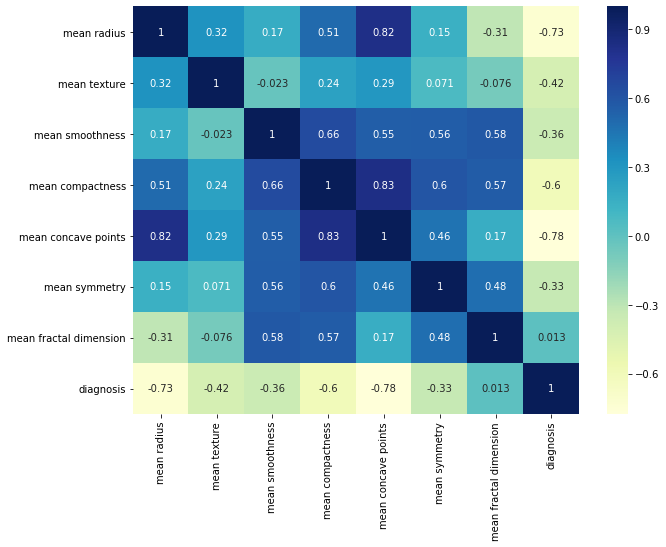

In [10]:
df_mean['diagnosis'] = data.target

corr = df_mean.corr()

plt.figure(figsize=(10,7.5))
ax = sns.heatmap(corr,
       annot = True,
       cmap="YlGnBu")

ax.set_ylim(8, 0)

(8, 0)

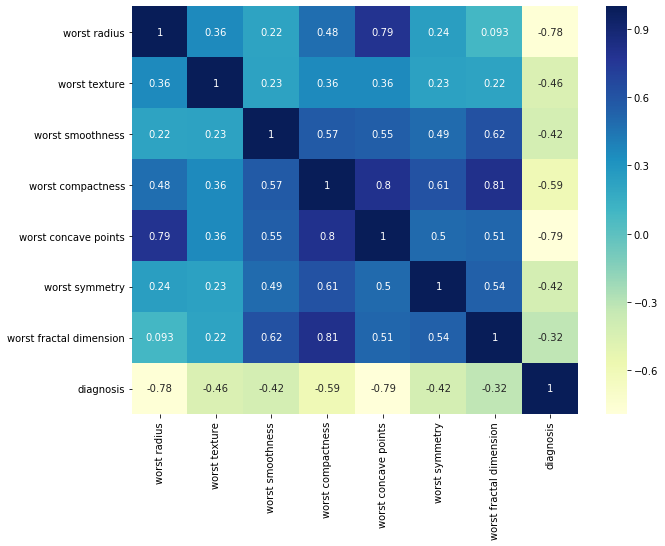

In [11]:
df_worst['diagnosis'] = data.target
corr = df_worst.corr()
# corr = df.corr()
plt.figure(figsize=(10,7.5))
ax = sns.heatmap(corr,
       annot = True,
       cmap="YlGnBu")

ax.set_ylim(8, 0)

(8, 0)

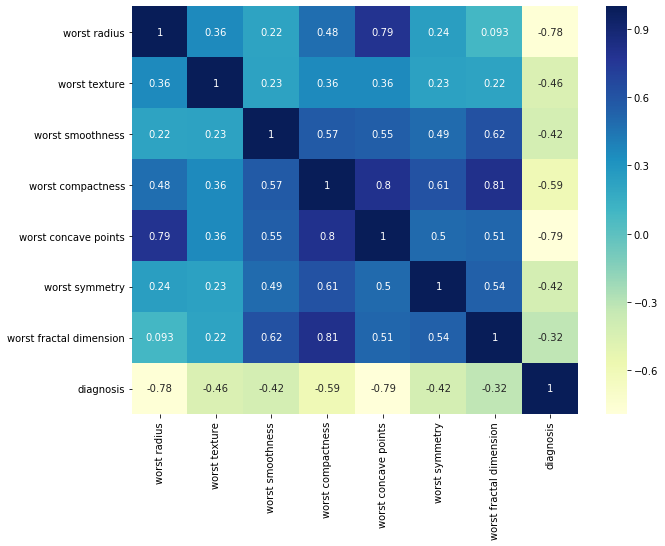

In [12]:
df_worst['diagnosis'] = data.target
corr = df_worst.corr()
# corr = df.corr()
plt.figure(figsize=(10,7.5))
ax = sns.heatmap(corr,
       annot = True,
       cmap="YlGnBu")

ax.set_ylim(8, 0)

### Scale and fit data to build model

#### Metrics function

In [13]:
def metrics(arr):
    """
    Input: 2X2 confusion matrix
    Outputs:  Classifier metrics
                - Accuracy
                - Precision
                - Recall
    """
    # Accuracy = correct / everything
    accuracy = (arr[0][0] + arr[1][1]) / (arr[0][0] + arr[0][1] + arr[1][1] + arr[1][0])
    
    # Precision = true positive / (true positive + false positive)
    precision = (arr[0][0]) / (arr[0][0] + arr[0][1])

    # Recall = true positive / (true positive + false negative)
    recall = arr[0][0] / (arr[0][0] + arr[1][0])
    
    return print(f' accuracy: {accuracy},\n precision: {precision},\n recall: {recall}')

#### RBF kernel and metrics

In [14]:
X = df_mean.drop('diagnosis', axis = 1)
Y = df_mean['diagnosis']

In [15]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# run fit transform on train
# run transform on test

(381, 7)
(188, 7)
(381,)
(188,)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
svm = SVC(kernel="rbf", C=1.0, gamma="auto")
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
svm.score(X_test, y_test)


0.9680851063829787

In [18]:
from sklearn.metrics import confusion_matrix
arr = confusion_matrix(y_test, y_pred)
metrics(arr)

 accuracy: 0.9680851063829787,
 precision: 0.9393939393939394,
 recall: 0.96875


#### Linear kernel and metrics

In [19]:
svm = SVC(kernel="linear", C=1.0, gamma="auto")
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
svm.score(X_test, y_test)

from sklearn.metrics import confusion_matrix
arr = confusion_matrix(y_test, y_pred)

metrics(arr)


 accuracy: 0.9574468085106383,
 precision: 0.9545454545454546,
 recall: 0.9264705882352942


#### Poly kernel and metrics (default for poly kernel, degree = 3)

In [20]:
svm = SVC(kernel="poly", C=1.0, gamma="auto")
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
svm.score(X_test, y_test)

from sklearn.metrics import confusion_matrix
arr = confusion_matrix(y_test, y_pred)

metrics(arr)

 accuracy: 0.9308510638297872,
 precision: 0.8333333333333334,
 recall: 0.9649122807017544


### Plots

Text(0.5, 1.0, 'SVM Decision Region Boundary')

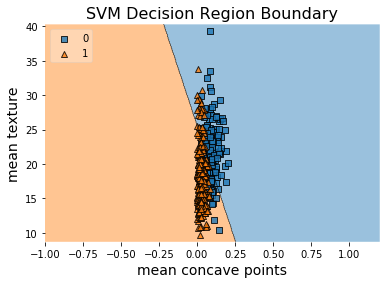

In [65]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = df_mean[['mean concave points', 'mean texture']]
# X = X_train
y = df_mean['diagnosis']

clf = SVC(kernel="linear", C=1.0, gamma="auto")
clf.fit(X.values, y.values)
# clf.fit(X_train, y)

plot_decision_regions(X=X.values,
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)


Text(0.5, 1.0, 'SVM Decision Region Boundary')

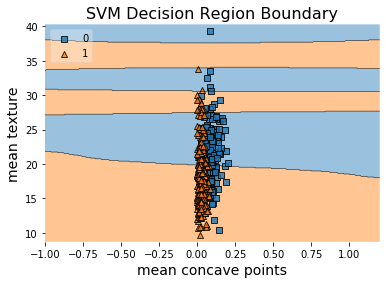

In [57]:
clf = SVC(kernel="rbf", C=.5, gamma='auto')
clf.fit(X.values, y.values)

plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

Text(0.5, 1.0, 'SVM Decision Region Boundary')

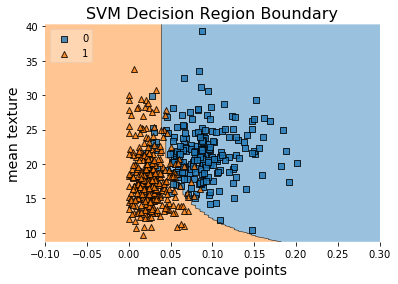

In [70]:
clf = SVC(kernel="poly", C=1.0, gamma="auto")
clf.fit(X.values, y.values)

plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
 
plt.xlim(-0.1,0.3)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)